In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
%matplotlib inline


In [3]:
datos = pd.read_csv('C:/Users/josep/OneDrive/Escritorio/Tesis/Series en Python/PT_RS28112018.csv',
                    parse_dates=['Date'],index_col=['Date'])
datos

,Numb,Pres,Temp,CouplerDetached,CouplerAttached,HostConnected,Stopped,EndOfFile
Date,,,,,,,,
2017-11-08 14:38:50,1,61.358,21.664,NaN,NaN,NaN,NaN,NaN
2017-11-08 15:08:50,3,66.178,21.855,NaN,NaN,NaN,NaN,NaN
2017-11-08 15:38:50,4,65.623,31.064,NaN,NaN,NaN,NaN,NaN
2017-11-08 16:08:50,5,65.589,31.676,NaN,NaN,NaN,NaN,NaN
2017-11-08 16:38:50,6,65.578,32.188,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2018-11-28 15:38:50,18484,63.184,31.472,NaN,NaN,NaN,NaN,NaN
2018-11-28 16:08:50,18485,62.798,15.569,NaN,NaN,NaN,NaN,NaN
2018-11-28 16:38:50,18486,62.171,15.664,NaN,NaN,NaN,NaN,NaN


In [4]:
datos_corregidos = datos['2017-11-08 15:08:50':'2018-02-02 21:38:50']['Pres']
datos_corregidos.describe()

count    4142.000000
mean       65.912269
std         0.187957
min        65.348000
25%        65.798250
50%        65.954000
75%        66.053000
max        66.410000
Name: Pres, dtype: float64

Text(0.5, 1.0, 'Serie de Presion Rio Salado')

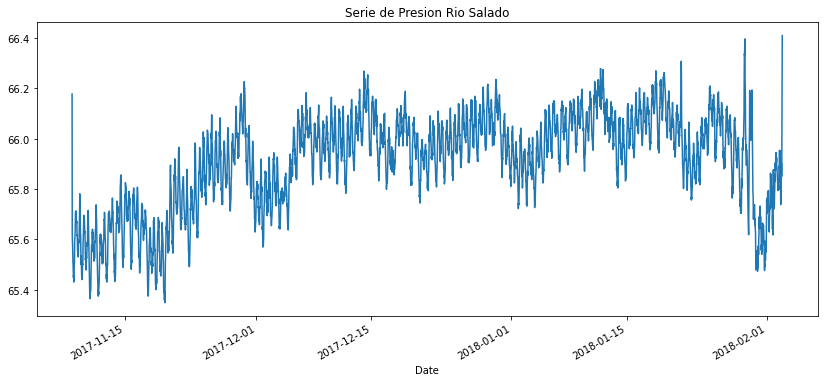

In [5]:
datos_corregidos.plot(figsize=(14,6)).set_title('Serie de Presion Rio Salado')

Text(0.5, 1.0, 'Serie de Descarga Rio Salado (m3/s)')

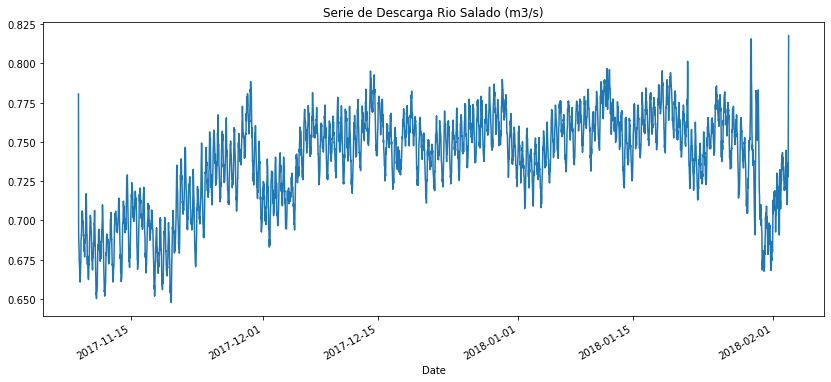

In [6]:
pres_rio = datos_corregidos-61.3
nivel_rio = pres_rio*0.10198
descarga = pres_rio*0.16
descarga.plot(figsize=(14,6)).set_title('Serie de Descarga Rio Salado (m3/s)')

In [11]:
descarga.describe()

count    4142.000000
mean        0.737963
std         0.030073
min         0.647680
25%         0.719720
50%         0.744640
75%         0.760480
max         0.817600
Name: Pres, dtype: float64

Text(0.5, 1.0, 'Serie de Presion Rio Salado Version 2')

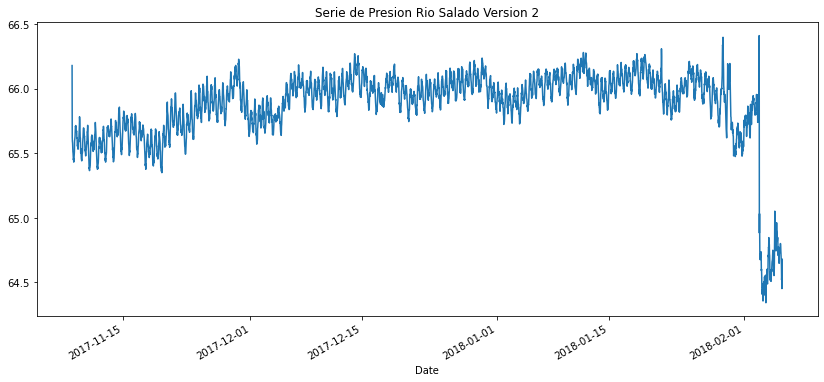

In [14]:
datos_corregidos_v2 = datos['2017-11-08 15:08:50':'2018-02-05 19:08:50']['Pres']
datos_corregidos_v2.plot(figsize=(14,6)).set_title('Serie de Presion Rio Salado Version 2')

In [8]:
datos_corregidos2 = datos['2018-02-02 22:08:50':]['Pres']
datos_corregidos2

Date
2018-02-02 22:08:50    64.881
2018-02-02 22:38:50    65.030
2018-02-02 23:08:50    64.879
2018-02-02 23:38:50    64.687
2018-02-03 00:08:50    64.682
                        ...  
2018-11-28 15:38:50    63.184
2018-11-28 16:08:50    62.798
2018-11-28 16:38:50    62.171
2018-11-28 17:08:50    62.198
2018-11-28 17:38:50    62.201
Name: Pres, Length: 14344, dtype: float64

<AxesSubplot:xlabel='Date'>

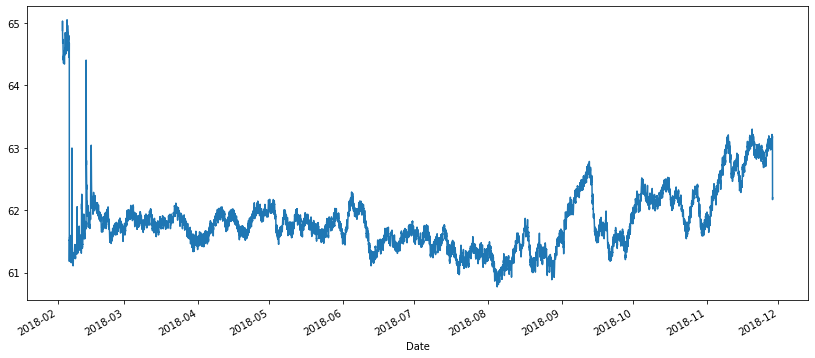

In [9]:
datos_corregidos2.plot(figsize=(14,6))

In [109]:
hola = pd.concat(datos_corregidos, datos_corregidos2)

TypeError: first argument must be an iterable of pandas objects, you passed an object of type "Series"

In [6]:
from statsmodels.tsa.stattools import adfuller
def test_stationary(timeseries):
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolmean, color='red', label='Media Movil')
    std = plt.plot(rolstd, color='black', label='Desviacion Estandar')
    plt.legen(loc='best')
    plt.title('Media Movil y Desviacion Estandar')
    plt.show(block=False)
    test_stationary(datos_corregidos['Pres'])

In [63]:
moving_avg = pd.rolling_mean(datos_corregidos['Pres'], 12)
datos_corregidos['Pres'].plot()
moving_avg.plot(label='Media Movil', color='red')
plt.title('Media Movil')
plt.legend(block='best')

AttributeError: module 'pandas' has no attribute 'rolling_mean'

<ipython-input-33-a7c4a8471c99>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


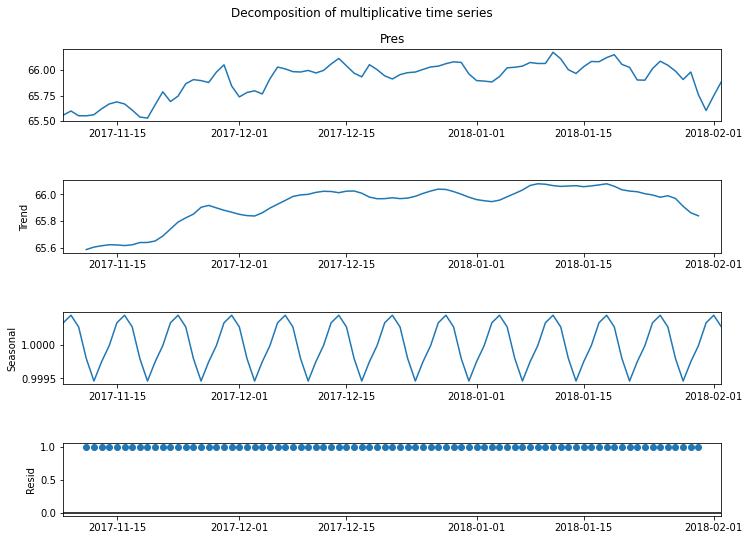

In [33]:
decomposition = sm.tsa.seasonal_decompose(datos_corregidos.resample('D').mean(), model='multiplicative')
fig = decomposition.plot()
fig.set_figwidth(12)
fig.set_figheight(8)
fig.suptitle('Decomposition of multiplicative time series')
fig.show()